# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, roc_curve

from sklearn.svm import l1_min_c

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [6]:
df = pd.read_csv("adultData.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind.

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [7]:
df.shape

(32561, 15)

In [8]:
df.dtypes

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

In [9]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
count,32399.000000,30725,3.256100e+04,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32236.000000,31978,32561
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Non-Female,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.589216,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,615.907773,87.303830,40.450428,NaN,NaN
std,13.647862,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,2420.191974,402.960219,12.353748,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [10]:
df.drop(labels='fnlwgt', axis=1, inplace=True)
print(str(list(df.columns)))

['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income_binary']


In [11]:
df['label_income_binary'] = df['income_binary']

condition1 = (df['label_income_binary'] == '>50K')
df['label_income_binary'] = np.where(condition1, 'True', df['label_income_binary'])

condition2 = (df['label_income_binary'] == '<=50K')
df['label_income_binary'] = np.where(condition2, 'False', df['label_income_binary'])

df.head() # false means <=50k income, true is >50k income

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,label_income_binary
0,39.0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,False
1,50.0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,False
2,38.0,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,False
3,53.0,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,False
4,28.0,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,False


In [12]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

age                     162
workclass              1836
education                 0
education-num             0
marital-status            0
occupation             1843
relationship              0
race                      0
sex_selfID                0
capital-gain              0
capital-loss              0
hours-per-week          325
native-country          583
income_binary             0
label_income_binary       0
dtype: int64

In [ ]:
# df['age'] = df['age'].isnull()
mean_ages = df['age'].mean()
df['age'].fillna(value=mean_ages, inplace=True)

mean_hours = df['hours-per-week'].mean()
df['hours-per-week'].fillna(value=mean_hours, inplace=True)

In [14]:
df.dropna(inplace = True)
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,label_income_binary
0,39.0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,False
1,50.0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,False
2,38.0,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,False
3,53.0,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,False
4,28.0,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,False


In [15]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

age                    0
workclass              0
education              0
education-num          0
marital-status         0
occupation             0
relationship           0
race                   0
sex_selfID             0
capital-gain           0
capital-loss           0
hours-per-week         0
native-country         0
income_binary          0
label_income_binary    0
dtype: int64

### Class imbalances

In [16]:
num_rows = df.shape[0]
indices = np.random.choice(df.index, size=int(num_rows * 0.3), replace=False)
df_subset = df.loc[indices]

print("df shape: ", df.shape)
print("df subset shape: ", df_subset.shape)
print(df['sex_selfID'].unique())

df shape:  (30162, 15)
df subset shape:  (9048, 15)
['Non-Female' 'Female']


In [17]:
ssID_counts = df_subset['sex_selfID'].value_counts()
print(ssID_counts)

ssID_counts['Female'] / sum(ssID_counts.values)

sex_selfID
Non-Female    6172
Female        2876
Name: count, dtype: int64


0.3178603006189213

In [18]:
race_counts = df_subset['race'].value_counts()
print(race_counts)

race
White                 7794
Black                  837
Asian-Pac-Islander     263
Amer-Indian-Inuit       82
Other                   72
Name: count, dtype: int64


In [19]:
print(df_subset.groupby(['sex_selfID', 'income_binary']).size())

low_nf, high_nf = df_subset.groupby(['sex_selfID', 'income_binary']).size()['Non-Female']
class_balance_nf = high_nf / low_nf

low_f, high_f = df_subset.groupby(['sex_selfID', 'income_binary']).size()['Female']

add_ss = int(class_balance_nf * low_f - high_f)
add_ss

sex_selfID  income_binary
Female      <=50K            2560
            >50K              316
Non-Female  <=50K            4287
            >50K             1885
dtype: int64


809

In [21]:
df_never_sampled = df.drop(labels=df_subset.index, axis=0, inplace=False)

upsample = (df_never_sampled['income_binary'] == '>50K') & (df_never_sampled['sex_selfID'] == 'Female')
df_ns_target = df_never_sampled[upsample]

size = min(add_ss, df_ns_target.shape[0])
indices = np.random.choice(df_ns_target.index, size=size, replace=False)

df_balanced_subset = pd.concat([df_subset, df.loc[indices]])

df_balanced_subset.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,label_income_binary
14722,31.0,Private,12th,8,Divorced,Transport-moving,Own-child,White,Non-Female,0,0,40.0,United-States,<=50K,False
17208,44.0,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Non-Female,0,0,45.0,United-States,<=50K,False
5390,31.0,Private,12th,8,Divorced,Other-service,Unmarried,White,Female,0,0,21.0,United-States,<=50K,False
29123,29.0,Private,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Non-Female,7688,0,54.0,United-States,>50K,True
12277,24.0,Private,Bachelors,13,Never-married,Tech-support,Own-child,White,Non-Female,0,0,40.0,United-States,<=50K,False


In [22]:
df = df_balanced_subset.drop('income_binary', axis=1)

In [23]:
df.groupby(['sex_selfID', 'label_income_binary']).size()

sex_selfID  label_income_binary
Female      False                  2560
            True                   1112
Non-Female  False                  4287
            True                   1885
dtype: int64

### One-hot encoding

In [24]:
# one-hot encoding
to_encode = list(df.select_dtypes(include=['object']).columns)
to_encode.remove('label_income_binary')
to_encode

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex_selfID',
 'native-country']

In [25]:
encoder = OneHotEncoder()
encoded_array = encoder.fit_transform(df[to_encode]).toarray()
df_encoded = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(to_encode))

In [26]:
non_enc = list(df.select_dtypes(include=['float64', 'int64']).columns)
non_enc.append('label_income_binary')
df_non_enc = df[non_enc]

In [27]:
df_non_enc.reset_index(drop=True, inplace=True)
df_encoded.reset_index(drop=True, inplace=True)

df = pd.concat([df_non_enc, df_encoded], axis=1)
df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,label_income_binary,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,31.0,8,0,0,40.0,False,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,44.0,9,0,0,45.0,False,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,31.0,8,0,0,21.0,False,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,29.0,10,7688,0,54.0,True,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,24.0,13,0,0,40.0,False,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
df.dtypes

age                               float64
education-num                       int64
capital-gain                        int64
capital-loss                        int64
hours-per-week                    float64
                                   ...   
native-country_Thailand           float64
native-country_Trinadad&Tobago    float64
native-country_United-States      float64
native-country_Vietnam            float64
native-country_Yugoslavia         float64
Length: 103, dtype: object

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [29]:
feature_list = list(df.select_dtypes("float64", "int64"))
# feature_list

In [30]:
X = df[feature_list]
y = df['label_income_binary']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1234)

In [32]:
def train_test_LR(X_train, y_train, X_test, y_test, c=1):
    model = LogisticRegression(C=c, max_iter=10000)

    model.fit(X_train, y_train)

    probability_predictions = model.predict_proba(X_test)
    l_loss = log_loss(y_test, probability_predictions)

    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)

    return l_loss, acc_score

loss, acc = train_test_LR(X_train, y_train, X_test, y_test)
print('Log loss: ' + str(loss))
print('Accuracy: ' + str(acc))

Log loss: 0.39891261514276555
Accuracy: 0.8197054342305738


### Hyperparameter tuning

In [33]:
cs = [10**i for i in range(-10,10)]
ll_cs = list()
acc_cs = list()

for i in cs:
    loss, acc = train_test_LR(X_train, y_train, X_test, y_test, i)
    ll_cs.append(loss)
    acc_cs.append(acc)

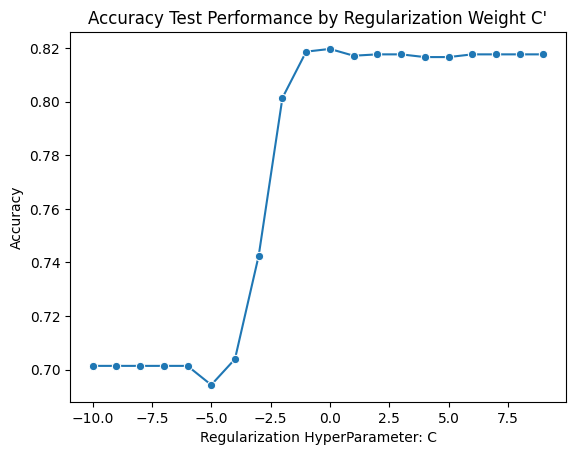

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.log10(cs)

sns.lineplot(x=x, y=acc_cs, marker='o')

plt.title("Accuracy Test Performance by Regularization Weight C'")
plt.xlabel("Regularization HyperParameter: C")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
model = LogisticRegression(max_iter=10000, C=0.01) # 0.1-1 for optimal C
model.fit(X_train, y_train)

In [52]:
proba_predictions = model.predict_proba(X_test)[:, 1]
class_label_predictions = model.predict(X_test)

acc_score = accuracy_score(y_test, class_label_predictions)
acc_score

0.8014220416455053

In [53]:
cm = confusion_matrix(y_test, class_label_predictions, labels=['True','False'])
df_cm = pd.DataFrame(cm, columns=['Predicted: Income is >$50K', 'Predicted: Income is <=$50K'],
                                 index=['Actual: Income is >$50K', 'Actual: Income is <=$50K'])
df_cm

,Predicted: Income is >$50K,Predicted: Income is <=$50K
Actual: Income is >$50K,322,266
Actual: Income is <=$50K,125,1256


In [54]:
param_grid = {
    "C": [0.001, 0.01, 1, 2, 3, 5, 7, 9, 10]
    }

print('Running Grid Search...')

model = LogisticRegression(max_iter=10000)
grid = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [55]:
best_c = grid_search.best_params_['C']
print(f'Best C: {best_c}')

model_best = LogisticRegression(C=best_c, max_iter=10000)
model_best.fit(X_train, y_train)

proba_predictions_best = model_best.predict_proba(X_test)[:, 1]
class_label_predictions_best = model_best.predict(X_test)

acc_score = accuracy_score(y_test, class_label_predictions)
print(f'Accuracy: {acc_score}')

Best C: 1
Accuracy: 0.8014220416455053


In [56]:
cm_best = confusion_matrix(y_test, class_label_predictions_best, labels=['True','False'])
df_cm_best = pd.DataFrame(cm_best, columns=['Predicted: Income is >$50K', 'Predicted: Income is <=$50K'],
                                 index=['Actual: Income is >$50K', 'Actual: Income is <=$50K'])
df_cm_best

,Predicted: Income is >$50K,Predicted: Income is <=$50K
Actual: Income is >$50K,371,217
Actual: Income is <=$50K,138,1243


In [57]:
y_test = y_test.map({'True': 1, 'False': 0}).astype(int)
fpr, tpr, thresholds = roc_curve(y_test, proba_predictions)
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, proba_predictions_best)

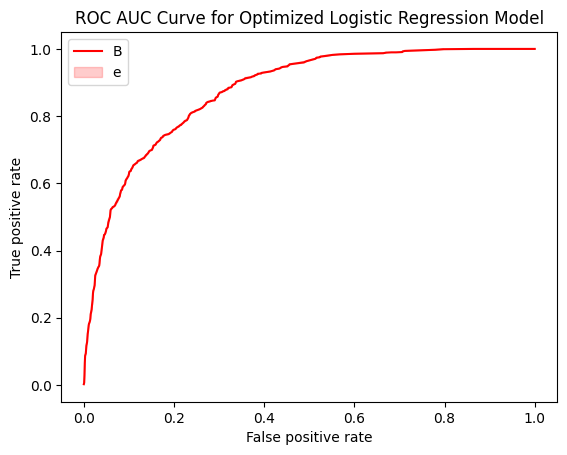

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x=fpr_best, y=tpr_best, color='r')

plt.title("ROC AUC Curve for Optimized Logistic Regression Model")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend("Best hyperparameter")
plt.show()